### Understanding Pydens
A Neural Network Frameworks constrained under physical equations 

In [1]:
from pydens import Solver, D, V, ConvBlockModel
from pydens import NumpySampler as NS
import numpy as np
import torch


In [2]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from mpl_toolkits import mplot3d
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib widget
#%matplotlib inline

### Use Case 1:
Using Pydens to solve explicit partial differential equations -> Estimate solution numerically via minimization of a least squares problem 

In [3]:
# Similar to optimization problems define as callable 
def pde(f, x, y):
    return D(D(f, x), x) + D(D(f, y), y) - torch.cos(np.pi*x) -torch.sin(np.pi*y)+torch.cos(np.pi*x)*torch.sin(np.pi*y)# D is the differential operator 

# Pass callable equation, dimensions, boundary condition 
# NN layer architecture -> fa fa fa f -> 4 hidden layers each with tanh activation function 
solver = Solver(equation=pde, ndims=2, boundary_condition=1,
                layout='fa fa fa f', activation='Tanh', units=[10, 12, 15, 1])

In [4]:
solver.fit(batch_size=100, niters=1500)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:08<00:00, 171.63it/s]


### Grid to evaluate on

In [5]:
x=np.linspace(0, 1, 100)
y=np.linspace(0, 1, 100)

def cart_prod(*arrs):
    """ Get array of cartesian tuples from arbitrary number of arrays.
    """
    grids = np.meshgrid(*arrs, indexing='ij')
    return np.stack(grids, axis=-1).reshape(-1, len(arrs))

grid = cart_prod(x,y)

approxs = solver.predict(grid[:, 0:1], grid[:, 1:2]).reshape((100, 100))

In [6]:
def plot_approximation_3d(approximation):
    fig = plt.figure(figsize=(14,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.invert_xaxis()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x,y)')
    ax.set_title(' Solution to Poisson Equation')
    surf=ax.plot_surface(grid[:, 0:1].reshape(100,100), grid[:, 1:2].reshape(100,100),approximation ,linewidth=0.1,cmap=cm.coolwarm)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()

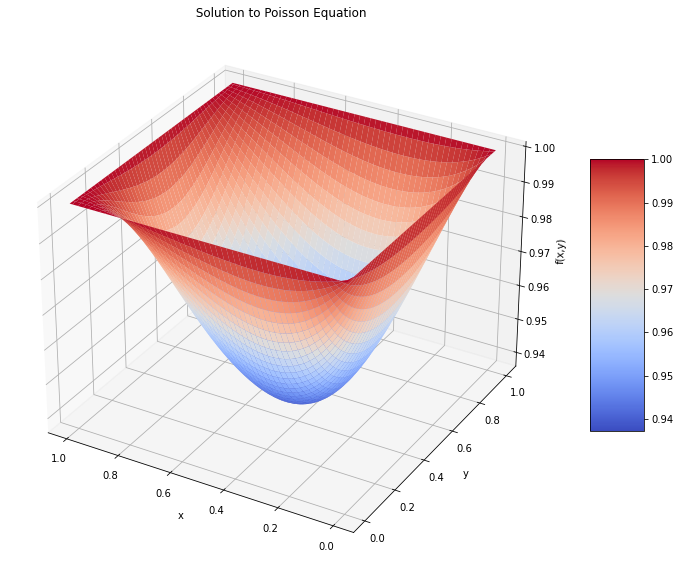

In [7]:
plot_approximation_3d(approxs)

### Use Case 2:
Using Pydens to reconstruct the most likely dynamical system (linear decomposition of partial differential equation) for a given sparse set of features 